In [1]:
# thinking about how the probability mass should be distributed
# why is the ideal model just the normalized counts

In [2]:
import numpy as np
import torch

In [3]:
xs = np.arange(0, 1.0, 0.01)
xs_complement = 1 - xs

# area perimeter tradeoff is far more general than just geometry
xs ** 3 * xs_complement

array([0.0000000e+00, 9.9000000e-07, 7.8400000e-06, 2.6190000e-05,
       6.1440000e-05, 1.1875000e-04, 2.0304000e-04, 3.1899000e-04,
       4.7104000e-04, 6.6339000e-04, 9.0000000e-04, 1.1845900e-03,
       1.5206400e-03, 1.9113900e-03, 2.3598400e-03, 2.8687500e-03,
       3.4406400e-03, 4.0777900e-03, 4.7822400e-03, 5.5557900e-03,
       6.4000000e-03, 7.3161900e-03, 8.3054400e-03, 9.3685900e-03,
       1.0506240e-02, 1.1718750e-02, 1.3006240e-02, 1.4368590e-02,
       1.5805440e-02, 1.7316190e-02, 1.8900000e-02, 2.0555790e-02,
       2.2282240e-02, 2.4077790e-02, 2.5940640e-02, 2.7868750e-02,
       2.9859840e-02, 3.1911390e-02, 3.4020640e-02, 3.6184590e-02,
       3.8400000e-02, 4.0663390e-02, 4.2971040e-02, 4.5318990e-02,
       4.7703040e-02, 5.0118750e-02, 5.2561440e-02, 5.5026190e-02,
       5.7507840e-02, 6.0000990e-02, 6.2500000e-02, 6.4998990e-02,
       6.7491840e-02, 6.9972190e-02, 7.2433440e-02, 7.4868750e-02,
       7.7271040e-02, 7.9632990e-02, 8.1947040e-02, 8.4205390e

In [4]:
raw = open("./data/names.txt").read()
names = raw.split("\n")

len(names), len(set("".join(names)))

(32033, 26)

In [5]:
bigrams_dict = {}
for name in names:
  name = "." + name + "."
  for idx in range(1, len(name)):
    bigram = (name[idx - 1], name[idx])
    bigrams_dict[bigram] = bigrams_dict.get(bigram, 0) + 1

In [6]:
characters = set("".join(names))
characters.add(".")
char_to_idx = {char: idx for idx, char in enumerate(sorted(list(characters)))}
idx_to_char = {idx: char for char, idx in char_to_idx.items()}

In [7]:
W = torch.zeros((len(characters), len(characters)))
for name in names:
  name = "." + name + "."
  for idx in range(1, len(name)):
    char1 = name[idx - 1]; char2 = name[idx]
    W[char_to_idx[char1], char_to_idx[char2]] += 1

In [11]:
W_normalized = W / W.sum(dim=1, keepdim=True)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000])

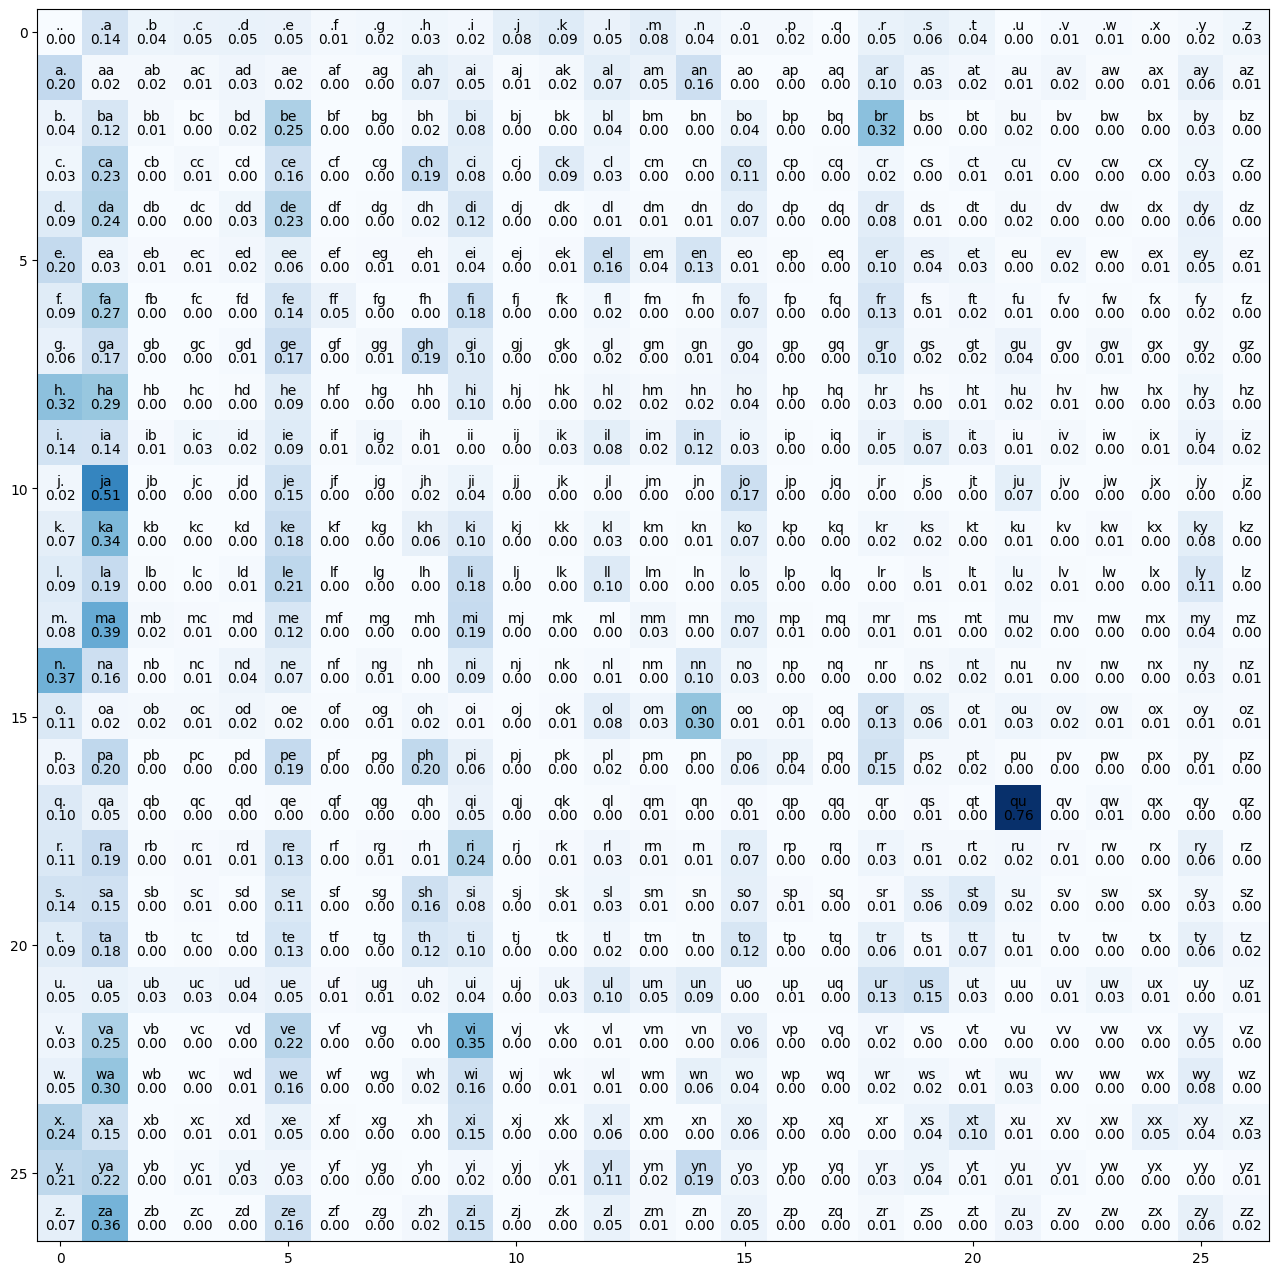

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 16))
plt.imshow(W_normalized, cmap="Blues")
for i in range(W.shape[0]):
  for j in range(W.shape[1]):
    plt.text(j, i, idx_to_char[i] + idx_to_char[j], ha="center", va="bottom", color="black")
    plt.text(j, i, f"{W_normalized[i, j]:.2f}", ha="center", va="top", color="black")
    # plt.text(j, i, f"", ha="center", va="bottom", color="black")

In [23]:
# sampling
samples = []
generator = torch.Generator().manual_seed(14)
for _ in range(10):
  sample = "."
  while sample[-1] != "." or len(sample) == 1:
    last_char_idx = char_to_idx[sample[-1]]
    # sampled_idx = torch.multinomial(torch.ones(len(characters)) / len(characters), 1, generator=generator).item() # uniform distribution sanity check
    sampled_idx = torch.multinomial(W_normalized[last_char_idx], 1, generator=generator).item()
    sample += idx_to_char[sampled_idx]
  samples.append(sample)
  print(sample)

.annipryesosah.
.ftorbemylimah.
.ichiawy.
.a.
.s.
.eoneyn.
.besen.
.gaylish.
.brylya.
.wemcha.
